# CFD Results Post-Process & Validation


**The final step for the development of a CFD simulation for a problem of interest is to process and examine the validity of the obtained numerical results (a.k.a post-processing and validation step). These steps requires an in-depth engineering knowledge about the fundamentals of the physical problem of interest. Thus, the value of investing time in understanding the fundamental physics of the flow, once again is highlighted here. This process is done starting from general inspection on CFD simulation results and ends with more detail validation process.**

This section will discuss the results of a simulation of a flow over a cylinder with Reynolds number of 150. Although this particular case is for an unsteady laminar flow, the method of post processing will be similar when using other Reynolds numbers. An important aspect of the results to consider is the convergence of the simulation. The convergence of a CFD can be visualized by the residuals of continuity, momentum, velocity, and other key flow field variables. In FLUENT one can see the residuals during the simulation as a plot in the solver window. The type of residuals shown is based on the choice of models, and can be edited to manage details of the plot or add other residuals via plot/residuals.


<img src="./Images/residuals.jpg" width="500">
</br>
Fig. 1 - Residuals of continuity and x- and y-velocity for simulation of flow over a cylinder with Re=150.

Figure one displays the residuals of continuity and velocity versus the number of iterations. The oscillating trend of residual values represents the alternating vortices that are shedding from either side of the cylinder in unsteady flow. Once the oscillations become steady, the residuals confirm the numerical solution of the governing equations are converging to final values by reaching 10E-3 each cycle. As a rule of thumb the first general criteria to confirm convergence of a CFD simulation is reaching the continuity residual of 10E-3. In this case after 10000 iterations the oscillations become steady which confirms the convergence of an unsteady CFD simulation. Users can also define criteria to stop the iteration process once the desired criteria is met. For this case study the iterations were stopped after FLUENT-set iterations as shown in fig. one.
The second step is to visualize the dimensionless form of the important variables within the CFD domain. This visualization step can be problem specific and should be performed over an adequate plane of choice. For most of the problems contour of normalized velocity or pressure over a horizontal or vertical plane at the center of the CFD domain is a good start point. The path to define an adequate visualization probe such as planes or lines is surface/plane-bounded. With this path a user can define various types of surface probes to visualize the obtained numerical results over them. However, for the current problem, since the entire domain is two dimensional and planar, it would make the entire domain the best candidate for the post-processing plane. 
The user should now define the normalized variable of interest that needs to be visualized. The normalized streamwise velocity by the inlet velocity can be defined using define/custom-field-functions/define, name the variable (e.g. normalized_streamwise_velocity) and put the required formula for the variable of interest with correct syntax under x_velocity/1. This will define and calculate the normalized streamwise velocity with free stream velocity within entire CFD domain. In order to visualize the defined normalized flow field variable in the previous step users should use display/contour/normalized_streamwise_velocity and set the range of [0, 1.6] to visualize the ‘normalized velocity contours and its legend as shown in figure 2:


<img src="./Images/vel_contours.jpg" width="500">
</br>
Fig. 2 - Contours of normalized streamwise velocity with the free stream velocity over a cylinder for unsteady flow.

Figure 2 visualizes the normalized streamwise velocity with free stream for unsteady flow. The general physics for this flow is similar to the steady case. Flow enters the domain with normalized velocity of 1. Due to the imposed no slip boundary conditions over the surface of the cylinder, the velocity instantly decreases to zero on the nose of the cylinder and a laminar boundary layer starts to form and grow around the cylinder’s surface. Moving slightly further downstream at the top and bottom edges of the cylinder, where the formed laminar boundary layer is exposed to the free stream velocity, a shear layer will form and result in an accelerated flow region, colored with dark red, at these two points. These two accelerated regions can be thought of as continuous vortices along the cylinder’s surface. Since the body of the cylinder, as a blunt body, is blocking the incoming flow, a decelerated region of flow would form right at the back of the cylinder, as shown in blue. This area is the place in which the flow recirculates and two counter rotating vortices, as a result of flow moving over the top and bottom curved surfaces of the cylinder, would form here.
At low Reynolds numbers (i.e. below Re=100) this region would stay attached to the cylinder. However, in this study case the Reynolds number is great enough to cause unsteady vortex shedding from the cylinder. This phenomena is known as the von Karman effect and it is a well-known physical process.
Moving further downstream of the cylinder, as a result of a momentum gradient between the formed shear layer at the top and bottom edges of the cylinder and the recirculation zone behind the cylinder, a wake with velocity deficit is created and is shown by the light green color. Moving even further downstream and getting closer to the outlet boundary this wake recovers and the velocity becomes very close to the freestream velocity at the inlet of the CFD domain.
After performing the general post-processing steps, the user need to perform more detail oriented post-processing to confirm the validity of the CFD simulation. This stage can be a state-of-the-art. Comparing the numerical results against the theory (discussed earlier) or any other available experimental results is the final stage of post-processing. It is extremely important to calculate the correct corresponding numerical variables and compare them against the experimental or other numerical data.
In order to validate the numerical results from the simulation the numerically predicted drag coefficients of the cylinder were compared against the corresponding experimentally measured drag coefficient values for the Reynolds number. The reason behind choosing the drag coefficient is that the cylinder is significantly affected by the pressure forces acting on the body of the cylinder and generation a wake behind the cylinder. In the unsteady case, the drag coefficient alternates and will not be a steady value. In order to compare the numerical data, the user must take the average of the coefficients to determine a single value that can be used. The experimental data is from a study that was included in the article, "Computations of the drag coefficients for low-Reynolds-number flow past rings" in the 2005 Journal of Fluid Mechanics [1]. It is worth to mention that in the laminar flows the effect of viscous forces on the drag force and coefficient on the cylinder is minimum, while the effect of inertial forces is dominant. 
The value of the drag coefficient of the cylinder is defined as: 
 
 $$ C_D~=~\frac{F_D}{\frac{1}{2} . \rho_{ref} . V_{ref} ^2 . A_{proj}}. $$

In this equation $F_D$, the total drag force due to pressure and viscous forces within the flow acting on the cylinder's surface in the streamwise direction, is normalized with the available momentum within the undisturbed incoming flow that could be exerted on the cylinder. The value of this momentum is calculated using $\rho_{ref}$ as the reference density of the flow, which is the density of the flow. $V_{ref}$ as the undisturbed streamwise flow velocity in the inlet and $A_{proj}$, which is the projected area of the cylinder surface. For a two-dimensional cylinder the projected area is equal to the diameter of the cylinder. This is the area where pressure and viscous forces are acting on the cylinder in the streamwise direction. It should be noted that the pressure and viscous forces in the perpendicular direction to streamwise direction cancel each other. Hence, the forces and areas that they act on does not have any contribution to the drag force and coefficient.

Users can calculate and report the value of the drag coefficient following the report/forces/wall-forces. Running this command in the console will ask for the direction of the force, which in this case is the x-direction. Users should note that this command uses default reference variables to calculate the force coefficients. Therefore, it should be confirmed that the reference values are set correctly. This setting can be done using report/reference-values path and set the corresponding reference values for each variable as mentioned above and discussed extensively in the Physics section. The following table provides a summary of comparison between the experimentally measured and numerically calculated drag coefficient values: 

| Reynolds #     | $C_D$ Experiment| $C_D$ Numerical | Relative Error [%]|
    | :-------------:|:-------------:  | :-----:|:--------:|
    | 150             | 1.34            | 1.36   |1.35|
Table 1. – Comparison between the experimentally measured and numerically predicted cylinder drag coefficient.

Table 1 compares the experimentally measured and numerically calculated drag coefficient values for the case study of laminar flow over a cylinder and states the corresponding value of the relative error percentage. As shown in this table the value of the relative error percentage is below 2% and numerical and experimental values are in a close agreement with each other. It is important to highlight the fact that obtaining very accurate values for numerical drag coefficient requires running simulations for at least 10000 iterations. It can be shown that performing more iterations would decrease the value of the relative error to less than 2% as well. Since in this case the model is unsteady, drag coefficients corresponding to Reynolds numbers of 100 and below would disagree because they become steady, in which case the user should then switch to the steady model for these low Reynolds numbers. The unsteady model accounts for the increasingly significant effect of inertial forces in the flow, and can therefore accurately simulate higher Reynolds numbers such as this study case. 
User can also validate CFD results by calculating the vortex shedding frequency. This can be done using the flow velocity, the diameter, and the Strouhal number. The Strouhal number is a non-dimensional number that becomes important in oscillating flow.
At this stage one can conclude that this CFD numerical simulation is validated to study unsteady laminar flow over a cylinder. Therefore, these simulations can be used for similar or more complex problems, such as three dimensional laminar flow or unsteady flow over a sphere. This can be done be correct implementation in changing the corresponding solver, models, and/or boundary conditions. 


[1] J. Fluid Mech. (2005), vol. 526, pp. 257–275. 2005 Cambridge University Press DOI: 10.1017/S0022112004002836 Printed in the United Kingdom


# Insert a YouTube video Available on the SFO Channel 

Create a new cell using `Edit/Split Cell` path and insert the following lines in the newly created cell and compile it, while in `Code` environment rather than `Markdown` environment.

```
from IPython.display import YouTubeVideo
YouTubeVideo("kyAJiOXQIq4")
```

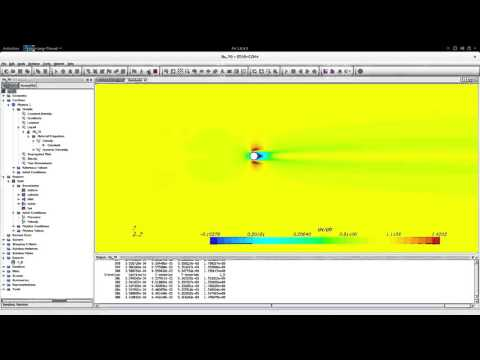

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("kyAJiOXQIq4")

## Write an Equation

### Within Text Body
Use single `$ <equation> $` symbol to put and equation (e.g. ```$y = \delta ~,~ u = 0.99 ~U_e .$```) within the text body.

Use single `$ <equation> $` symbol to put and equation (e.g. $y = \delta ~,~ u = 0.99 ~U_e .$) within the text body.

### Standalone
```
Use double `$$ <equation> $$` symbol to put equation in standalone format in the center of the page:

$$
\mathbf{R_{ext}} + \mathbf{F_v} -
\int \mathbf{n}~p~dA +
\int \rho \mathbf{g}~dV = 
\frac{\partial}{\partial t} \int \rho \mathbf{V} dV +
\int (\mathbf{n}~.~\rho \mathbf{V}) \mathbf{V} dA .
$$
```

Use double `$$ <equation> $$` symbol to put equation in standalone format in the center of the page:

$$
\mathbf{R_{ext}} + \mathbf{F_v} -
\int \mathbf{n}~p~dA +
\int \rho \mathbf{g}~dV = 
\frac{\partial}{\partial t} \int \rho \mathbf{V} dV +
\int (\mathbf{n}~.~\rho \mathbf{V}) \mathbf{V} dA .
$$


## Cite Source(s)
```
> For more details on the physics, theory and equation derivation please see chapter 9, section 9.2 of "A Physical Introduction to Fluid Mechanics by Alexander J. Smits" 2nd edition. [Download Book Here!](http://www.efluids.com/efluids/books/efluids_books.htm)
```

> For more details on the physics, theory and equation derivation please see chapter 9, section 9.2 of "A Physical Introduction to Fluid Mechanics by Alexander J. Smits" 2nd edition. [Download Book Here!](http://www.efluids.com/efluids/books/efluids_books.htm)